In [1]:
import pandas as pd

# Load your dataset (replace 'train.csv' with your file name if different)
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  # Make sure you have this line to import pyplot


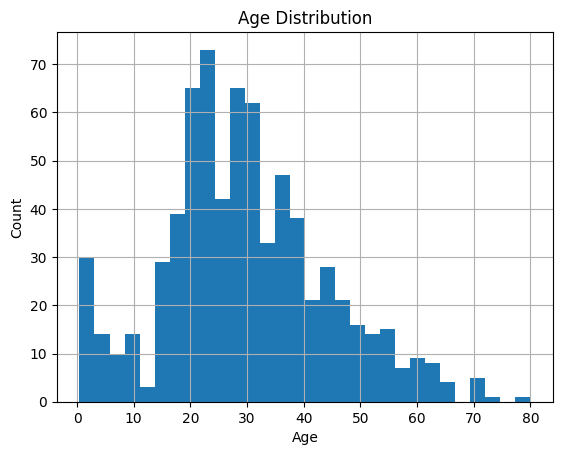

In [8]:
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


## Observations on Age Distribution:
- The **age distribution** of passengers is **right-skewed**, with most passengers being relatively younger.
- There is a noticeable peak in the **20-30 age range**, indicating that this is the most common age group among passengers.
- A few **outliers** (older passengers) are visible, with ages over 70 years old.
- Most passengers are between the ages of **20 and 40**, and the number of very young passengers (children) is relatively low.


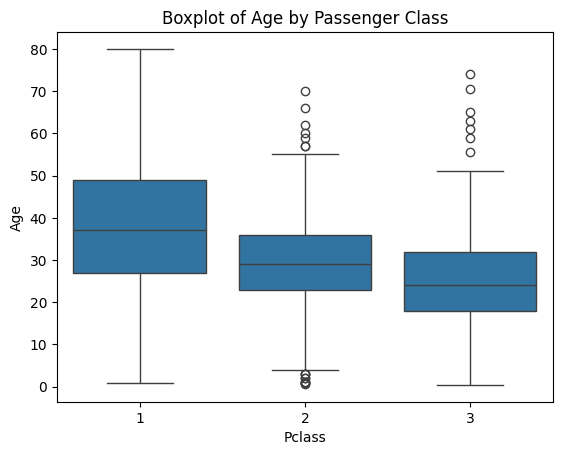

In [9]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title("Boxplot of Age by Passenger Class")
plt.show()

## Observations on Age by Passenger Class:
- The **median age** of passengers in **1st class** is higher than in **2nd and 3rd classes**.
- The **interquartile range (IQR)** for age in **3rd class** is wider, meaning passengers in 3rd class span a broader age range.
- There are several **outliers** in **3rd class**, particularly among younger passengers, with ages below 10.
- **1st class** passengers are generally older, and **3rd class** passengers have a larger spread of ages, including more younger passengers.


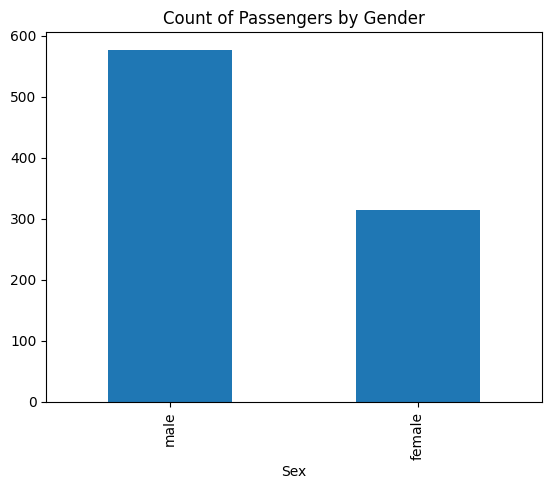

In [10]:
df['Sex'].value_counts().plot(kind='bar')
plt.title("Count of Passengers by Gender")
plt.show()


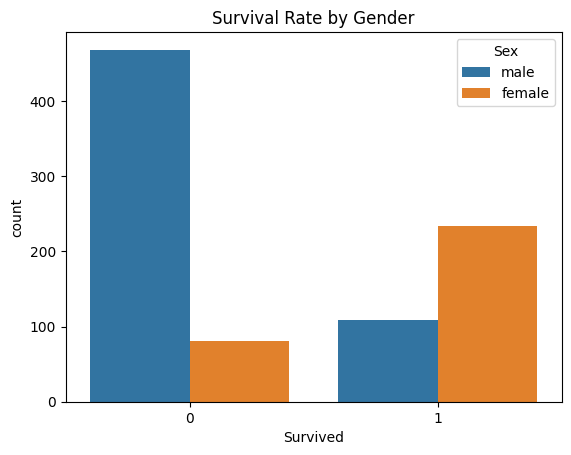

In [11]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Gender")
plt.show()


## Observations on Survival by Gender:
- **Females** had a significantly higher survival rate than **males**. The number of females who survived is clearly larger than the number of males who survived.
- The survival rate for **males** is much lower, with a large proportion of male passengers not surviving.
- This suggests that **gender may have played a role** in the survival chances of passengers, with women being prioritized for survival.


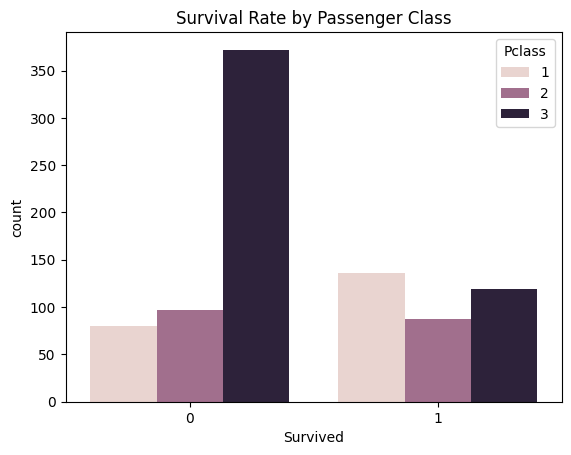

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


## Observations on Survival by Passenger Class:
- **1st-class passengers** had the highest survival rate, with a much larger proportion of them surviving compared to **2nd** and **3rd-class passengers**.
- **3rd-class passengers** had the lowest survival rate, which may suggest the lack of resources or being located in lower decks.
- **2nd-class passengers** had a survival rate between the other two classes, though lower than 1st-class.
- This indicates that **passenger class** strongly influenced survival chances, with **higher-class passengers** being more likely to survive.


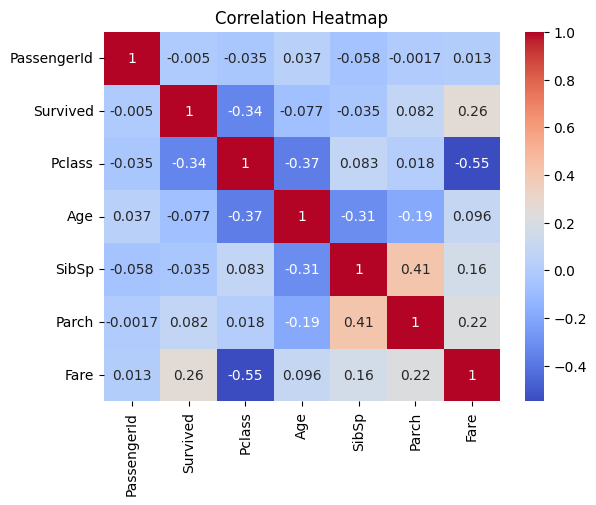

In [14]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix only for numeric columns
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




## Observations on Correlation Heatmap:
- There is a **strong negative correlation** between `Pclass` and `Fare` (r = -0.55). This suggests that passengers in **lower classes** (3rd class) paid **lower fares**, while passengers in **higher classes** (1st class) paid significantly more for their tickets.
- **Survived** is negatively correlated with `Pclass` (r = -0.34), indicating that passengers in **higher classes** had a better chance of survival.
- The correlation between `Age` and `Fare` is very **weak** (r = 0.09), suggesting that there is no strong relationship between passengers' ages and the fare they paid.
- **Fare** has a slightly **positive correlation** with `Age` (r = 0.1), meaning that older passengers tend to have slightly higher fares, but the correlation is not very strong.
- The correlation between `Age` and `Survived` is almost non-existent, indicating **age** had a weaker effect on **survival** compared to **class** and **gender**.


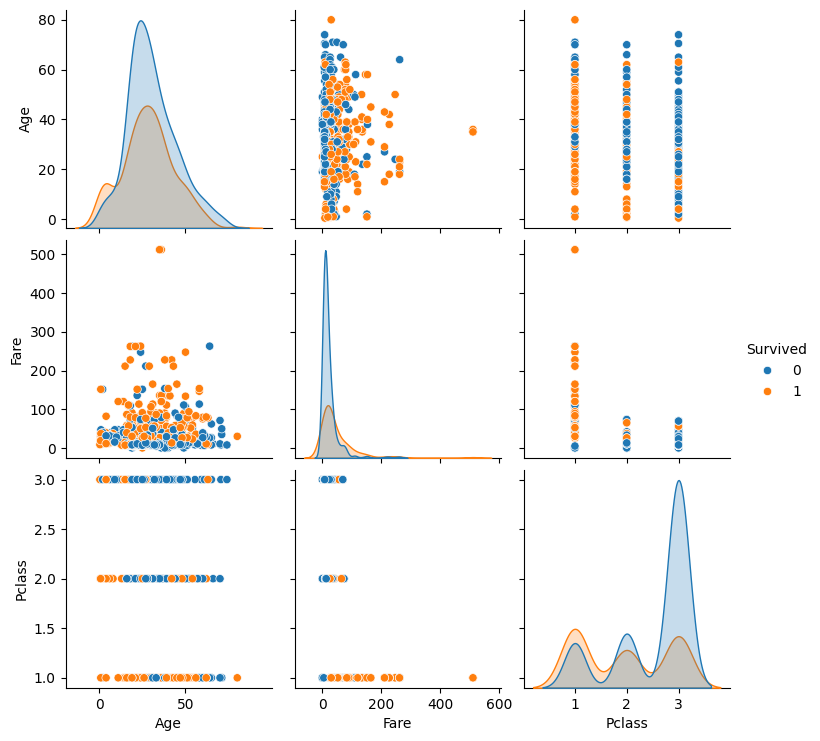

In [15]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()


## Observations on Pairplot (Survival, Age, Fare, Pclass):
- There is a clear separation between **survived and not survived** passengers. Those who survived (marked in blue) tend to be in **higher classes** (Pclass 1) and **tend to be younger** compared to those who did not survive.
- The **Fare** column shows that passengers who survived generally **paid higher fares** compared to those who didn't survive. This further supports the idea that **higher-class passengers** were more likely to survive.
- The **Age-Fare** relationship appears weak, but it seems that older passengers might have paid slightly higher fares.
- There is no noticeable pattern between **Age** and **Survival**, suggesting that age was not a strong factor influencing survival compared to class or gender.


## Summary of Findings:
- The **Age** distribution is **right-skewed**, with most passengers being younger, particularly in the **20-30 age range**.
- **Higher-class passengers** (1st class) tend to be **older** and had a **much higher survival rate** compared to passengers in **2nd and 3rd classes**.
- **Females** had a significantly **higher survival rate** than **males**, supporting the hypothesis that **gender played a role in survival**.
- **Correlations** show that **Pclass** (passenger class) has the strongest influence on survival, with **higher-class passengers** having a better chance of survival and paying higher fares.
- The **Fare** distribution is **skewed**, with some passengers paying very high fares, particularly in 1st class.
- The relationship between **Age** and **Fare** is weak, and **Age** alone doesn’t seem to strongly correlate with survival chances.
